## Default Credit Card Prediction



In [1]:
#This list includes all necessary imports

# Numerical operations
import numpy as np
# Data manipulation and analysis
import pandas as pd
# Plotting and visualization
import matplotlib.pyplot as plt
# Statistical data visualization
import seaborn as sns

# Creating synthetic datasets for classification
from sklearn.datasets import make_classification
# Random Forest models for classification and regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Various metrics for model evaluation
from sklearn.metrics import (
    accuracy_score, classification_report, 
    confusion_matrix, roc_auc_score, roc_curve, 
    precision_recall_curve, average_precision_score
)
# Tools for splitting data, cross-validation, and hyperparameter tuning
from sklearn.model_selection import (
    train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
)
# Standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# Handling imbalanced datasets by oversampling minority class
from imblearn.over_sampling import SMOTE
# Extreme Gradient Boosting for classification
from xgboost import XGBClassifier

# Deployment
# Flask for creating web applications
!pip install Flask
# Pickle for serializing and deserializing Python objects
import pickle


In [2]:
# Reading the data file from Google Colab
data = pd.read_csv('data.csv')  # Using pandas to read the CSV file into a DataFrame

# Displaying the first few rows of the dataset to understand its structure and contents
data.head()  # Calling the head() method to print the first five rows of the DataFrame

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
import pandas as pd  # Importing pandas for data manipulation and analysis

# Reading the data file 
# Skipping the first row during the initial read, assuming the first row contains unwanted data
data = pd.read_csv('data.csv', skiprows=1)

# Displaying the first few rows of the dataset to verify that the first row was skipped
data.head()  # Calling the head() method to print the first five rows of the DataFrame


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
# Get descriptive statistics for the dataset and round the values to 2 decimal places
# The describe() method provides a summary of the central tendency, dispersion, and shape of the dataset's distribution
pande = data.describe().round(2)

# Transpose the DataFrame to switch rows and columns for better readability
# Transposing makes it easier to read the statistics for each column
pande_transposed = pande.transpose()

# Display the transposed DataFrame
pande_transposed

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0


In [6]:
# Display information about the DataFrame
data.info()  # The info() method provides a concise summary of the DataFrame

# Check the count of non-null values in each column
non_null_counts = data.count()

# Display the non-null values count
non_null_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [7]:
data.isnull().sum()

#To show all null variables in each variable
#if null values are available, to remove null rows
#data.dropna()
#data.fillna(data.mean()) to fill null values with mean

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
data.duplicated().sum()
#if duplicates found, data.drop_duplicates()

0

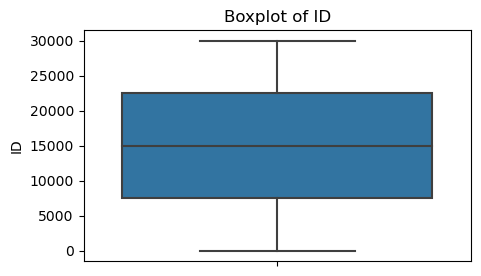

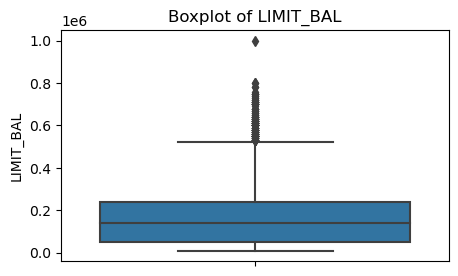

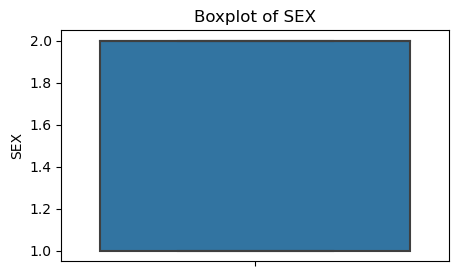

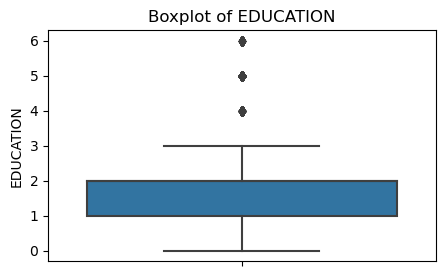

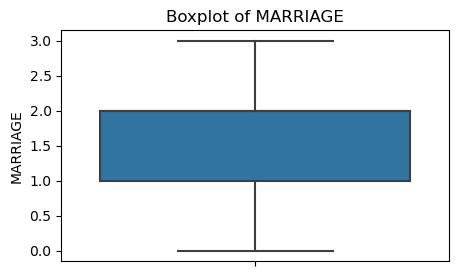

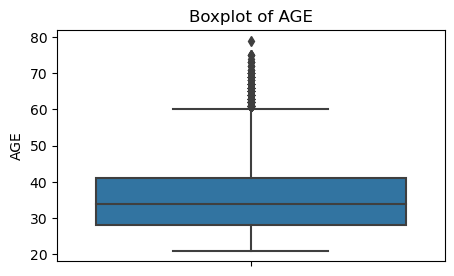

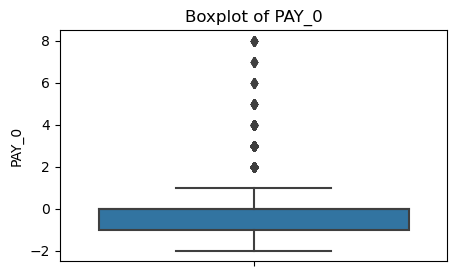

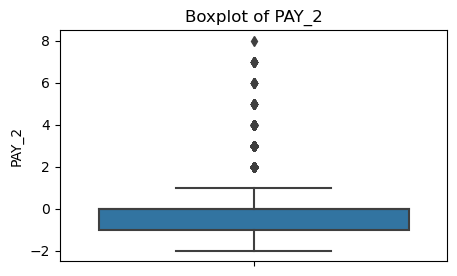

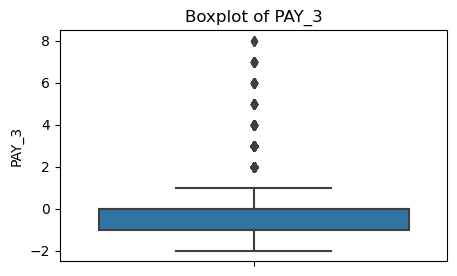

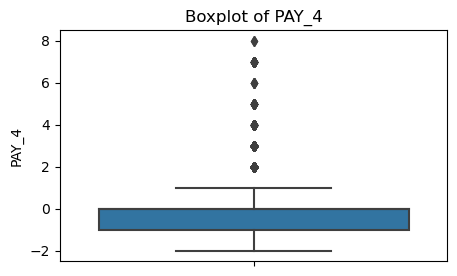

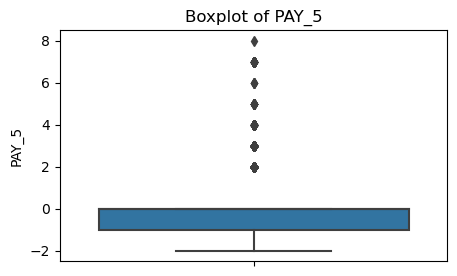

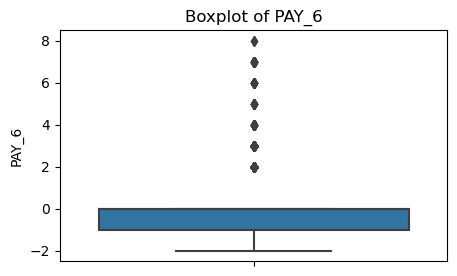

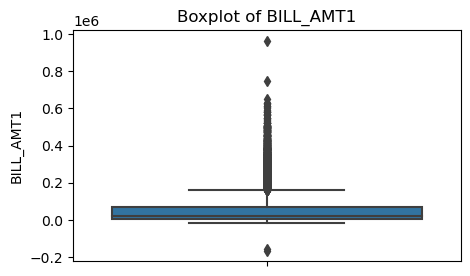

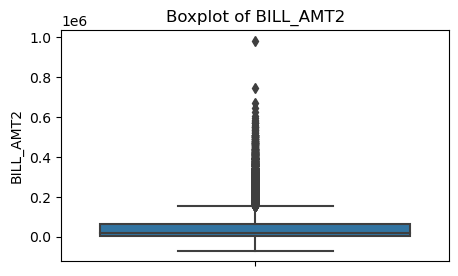

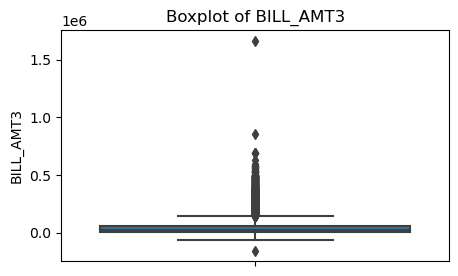

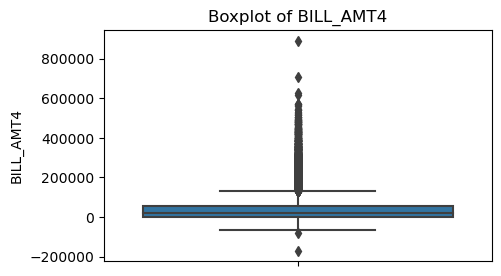

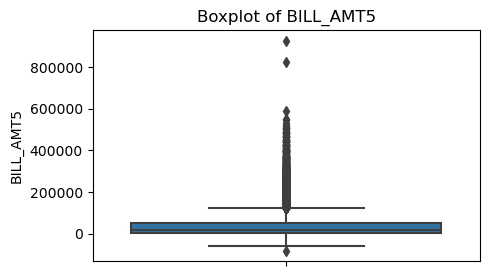

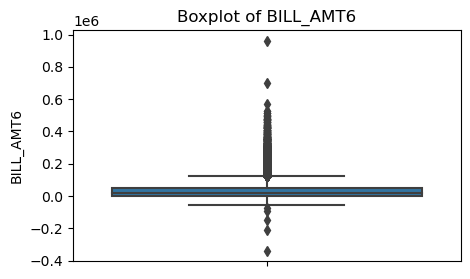

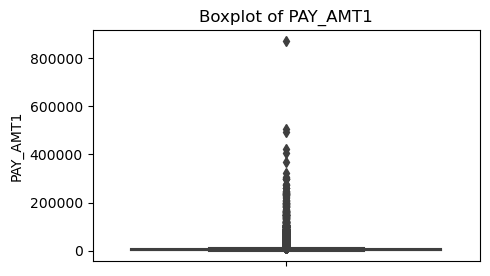

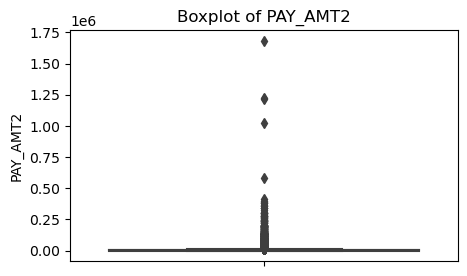

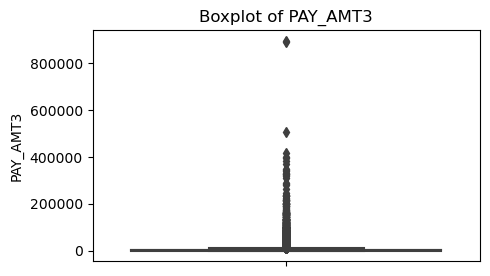

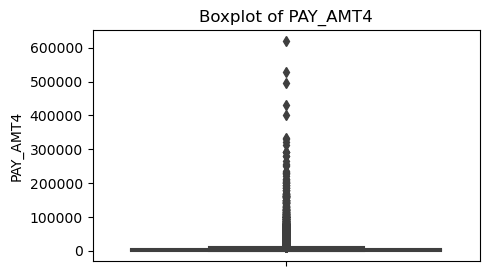

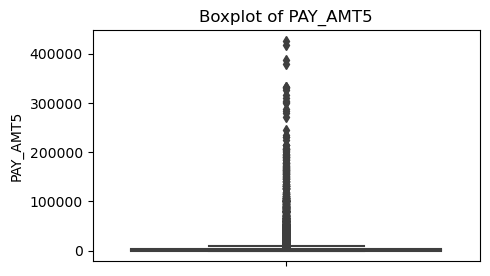

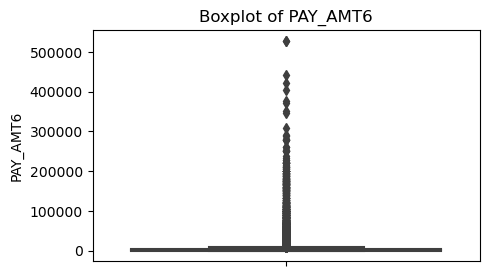

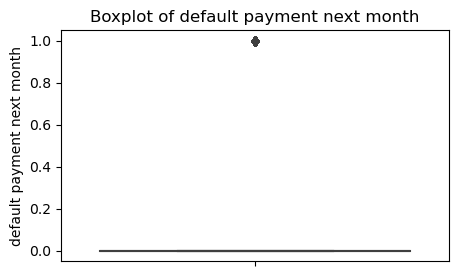

In [9]:
# Display boxplots for each column
for column in data.columns:
    plt.figure(figsize=(5, 3))  # Setting the figure size for each plot
    sns.boxplot(y=data[column])  # Creating a boxplot for the current column
    plt.title(f'Boxplot of {column}')  # Setting the title of the plot
    plt.ylabel(column)  # Labeling the y-axis with the column name
    plt.show()  # Displaying the plot

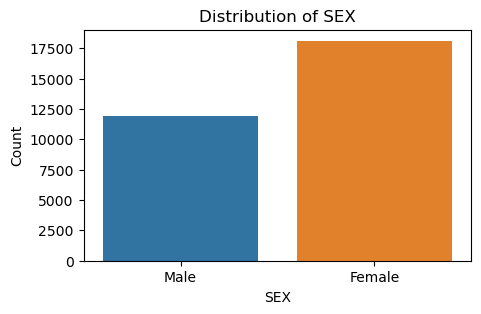

In [10]:
# Count plot for the SEX column
plt.figure(figsize=(5, 3))  # Setting the figure size for the plot
sns.countplot(x='SEX', data=data)  # Creating a count plot for the SEX column
plt.title('Distribution of SEX')  # Setting the title of the plot
plt.xlabel('SEX')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])  # Setting the x-axis ticks and labels
plt.show()  # Displaying the plot

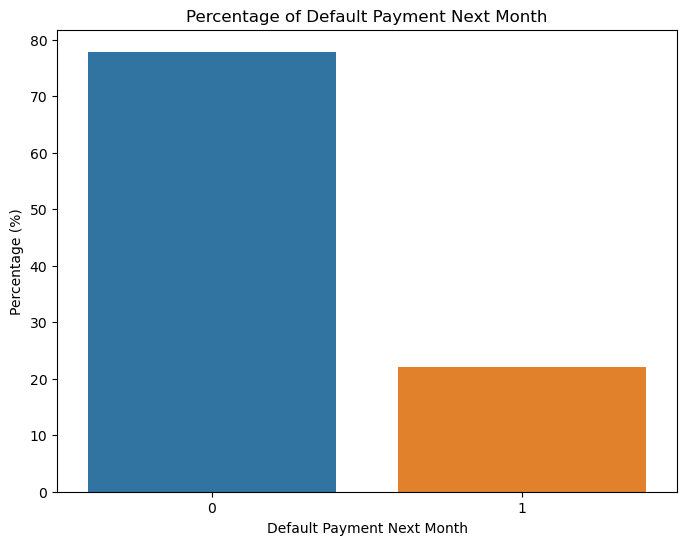

In [11]:
# Calculate the percentage of each category in 'default payment next month'
value_counts = data['default payment next month'].value_counts(normalize=True) * 100

# Convert the series to a DataFrame for easier plotting
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Default Payment', 'Percentage']

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Setting the figure size for the plot
sns.barplot(x='Default Payment', y='Percentage', data=value_counts_df)  # Creating a bar plot
plt.title('Percentage of Default Payment Next Month')  # Setting the title of the plot
plt.xlabel('Default Payment Next Month')  # Labeling the x-axis
plt.ylabel('Percentage (%)')  # Labeling the y-axis
plt.show()  # Displaying the plot

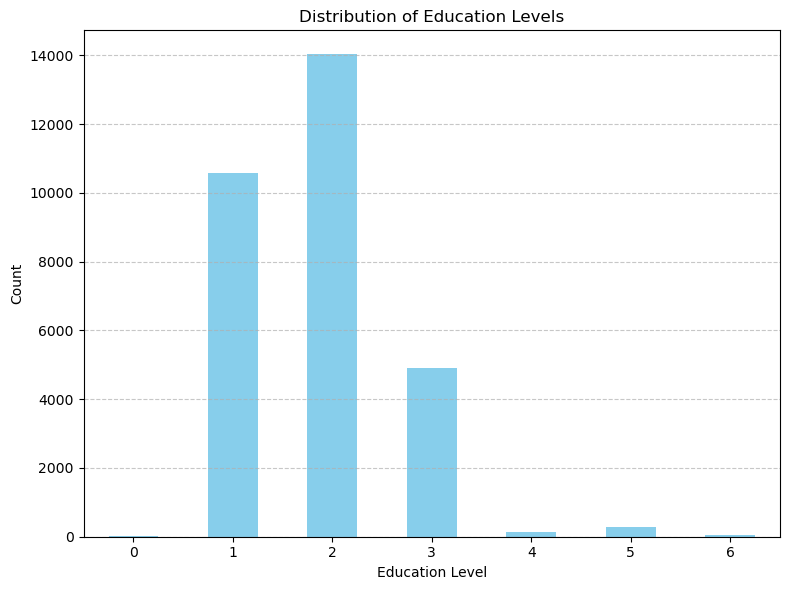

In [12]:
# Assuming 'Education' is the column name in your dataset
education_counts = data['EDUCATION'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
# Cleaning the 'EDUCATION' column by removing rows with specific values (0, 5, 6)
# Using the isin() method to identify rows with 'EDUCATION' values 0, 5, or 6
# Using the tilde (~) operator to negate the condition and filter out those rows
data = data[~data['EDUCATION'].isin([0, 5, 6])]

# Printing the number of rows and columns in the cleaned DataFrame
print("Number of rows after cleaning education column:", len(data))  # Displaying the number of rows
print("Number of columns:", len(data.columns))  # Displaying the number of columns


Number of rows after cleaning education column: 29655
Number of columns: 25


In [14]:
# Cleaning the 'MARRIAGE' column by removing rows where 'MARRIAGE' equals 0
# Using the inequality operator to filter out rows with 'MARRIAGE' value 0
data = data[data['MARRIAGE'] != 0]

In [15]:
# Printing the number of rows and columns in the cleaned DataFrame
print("Number of rows after cleaning marriage column:", len(data))  # Displaying the number of rows
print("Number of columns:", len(data.columns))  # Displaying the number of columns

Number of rows after cleaning marriage column: 29601
Number of columns: 25


In [16]:
# List of columns to check for the value -2
columns_to_check = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Filtering out rows where any of the specified columns contain the value -2
for column in columns_to_check:
    data = data[(data[column] != -2)] 

In [17]:
# Printing the number of rows and columns in the cleaned DataFrame
print("Number of rows after cleaning specific columns:", len(data))  # Displaying the number of rows
print("Number of columns:", len(data.columns))  # Displaying the number of columns

Number of rows after cleaning specific columns: 23150
Number of columns: 25


In [18]:
# List of columns to check for negative values
columns_to_check = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Filtering out rows where any of the specified columns contain negative values
for column in columns_to_check:
    data = data[data[column] >= 0]


In [19]:
# Printing the number of rows and columns in the cleaned DataFrame
print("Number of rows after cleaning specific columns:", len(data))  # Displaying the number of rows
print("Number of columns:", len(data.columns))  # Displaying the number of columns

Number of rows after cleaning specific columns: 22455
Number of columns: 25


In [20]:
# Get descriptive statistics for the dataset and round the values to 2 decimal places
# The describe() method provides a summary of the central tendency, dispersion, and shape of the dataset's distribution
pande = data.describe().round(2)

# Transpose the DataFrame to switch rows and columns for better readability
# Transposing makes it easier to read the statistics for each column
pande_transposed = pande.transpose()

# Display the transposed DataFrame
pande_transposed

,count,mean,std,min,25%,50%,75%,max
ID,22455.0,14927.87,8608.85,2.0,7507.0,14941.0,22218.5,30000.0
LIMIT_BAL,22455.0,155047.15,127046.88,10000.0,50000.0,120000.0,220000.0,1000000.0
SEX,22455.0,1.59,0.49,1.0,1.0,2.0,2.0,2.0
EDUCATION,22455.0,1.86,0.70,1.0,1.0,2.0,2.0,4.0
MARRIAGE,22455.0,1.56,0.52,1.0,1.0,2.0,2.0,3.0
AGE,22455.0,35.24,9.31,21.0,28.0,34.0,41.0,79.0
PAY_0,22455.0,0.19,0.99,-1.0,0.0,0.0,0.0,8.0
PAY_2,22455.0,0.21,1.03,-1.0,0.0,0.0,0.0,8.0
PAY_3,22455.0,0.19,1.02,-1.0,0.0,0.0,0.0,8.0
PAY_4,22455.0,0.15,0.99,-1.0,0.0,0.0,0.0,8.0


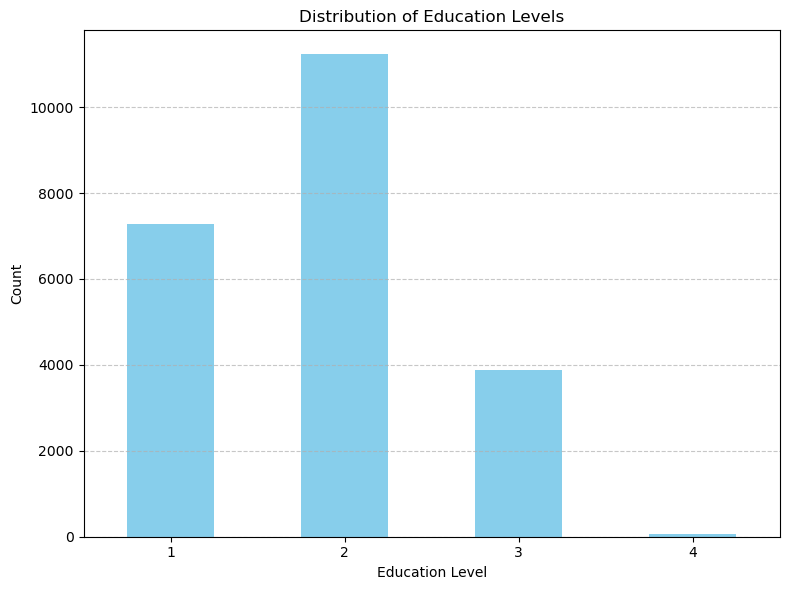

In [21]:
# Counting the occurrences of each education level and sorting by index (education level)
education_counts = data['EDUCATION'].value_counts().sort_index()

# Creating a bar plot for the distribution of education levels
plt.figure(figsize=(8, 6))  # Setting the figure size for the plot
education_counts.plot(kind='bar', color='skyblue')  # Creating a bar plot with skyblue bars
plt.title('Distribution of Education Levels')  # Setting the title of the plot
plt.xlabel('Education Level')  # Labeling the x-axis
plt.ylabel('Count')  # Labeling the y-axis
plt.xticks(rotation=0)  # Rotating the x-axis labels to 0 degrees for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding horizontal grid lines for better readability
plt.tight_layout()  # Adjusting the plot layout to make sure everything fits without overlapping
plt.show()  # Displaying the plot

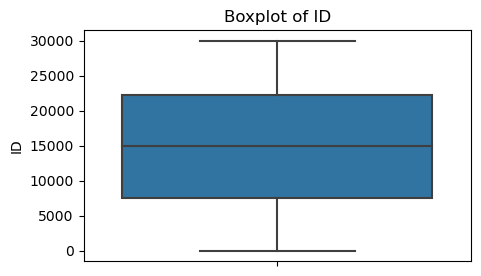

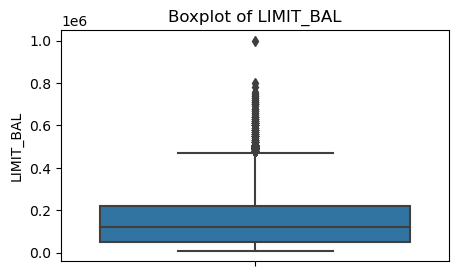

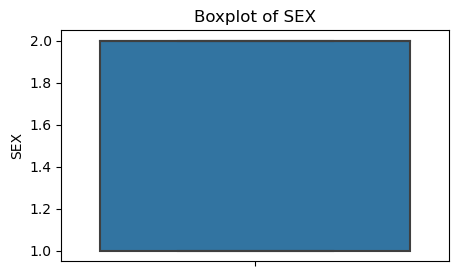

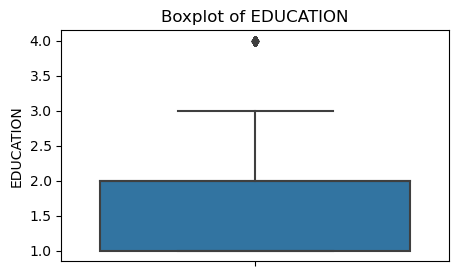

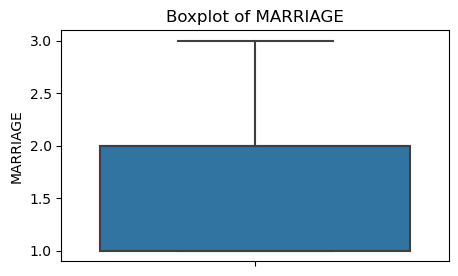

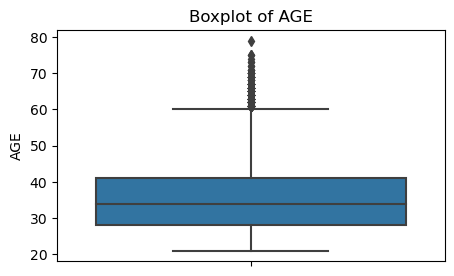

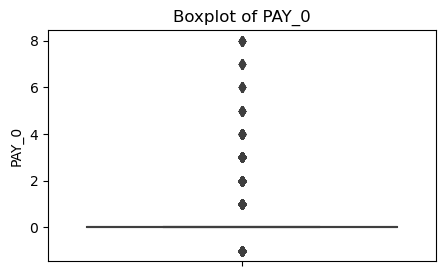

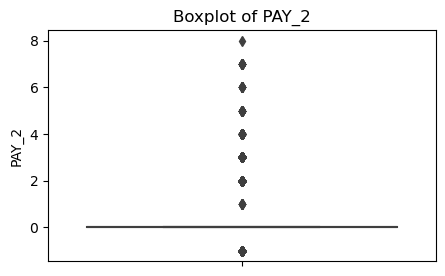

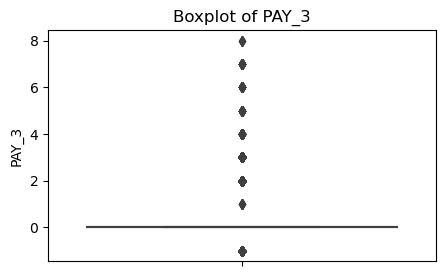

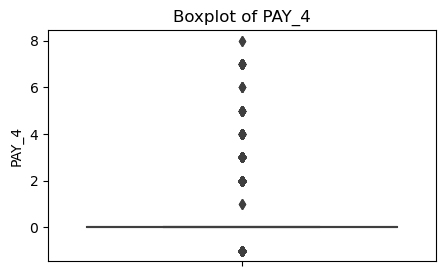

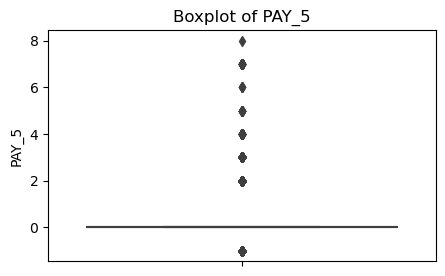

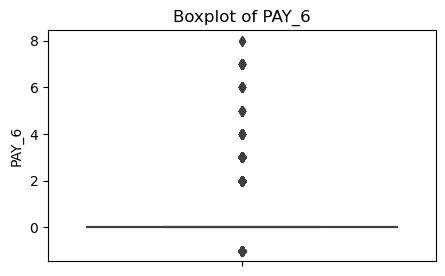

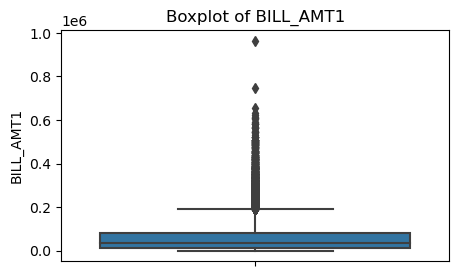

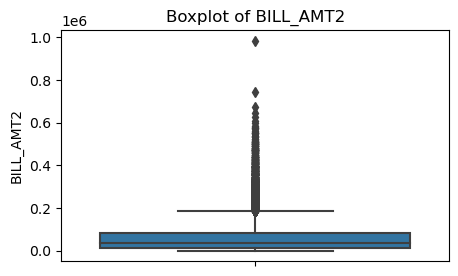

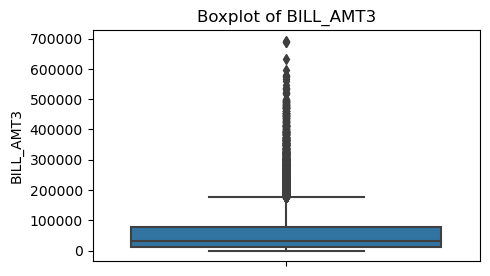

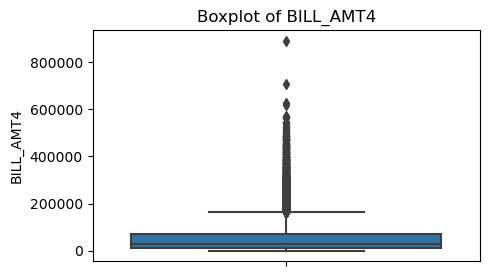

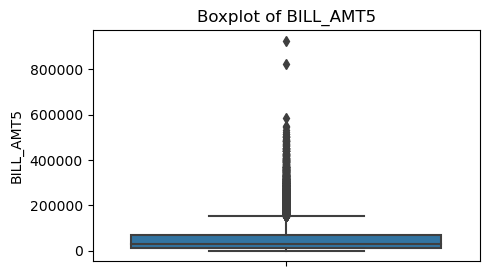

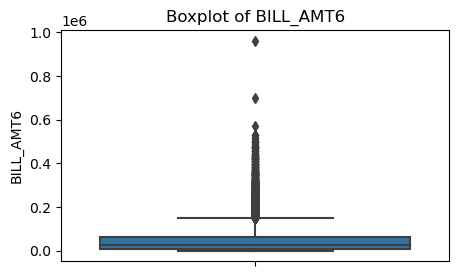

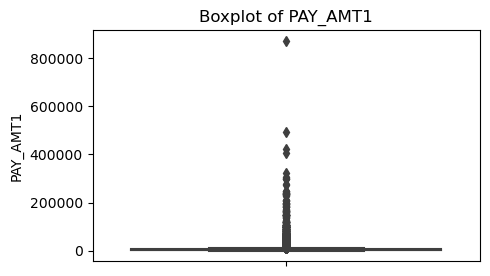

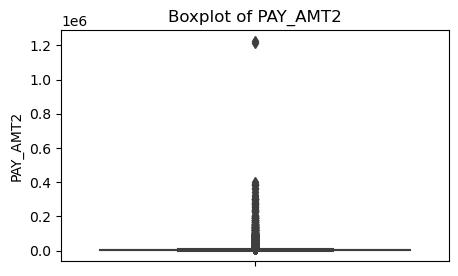

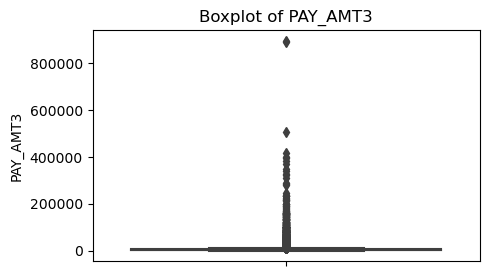

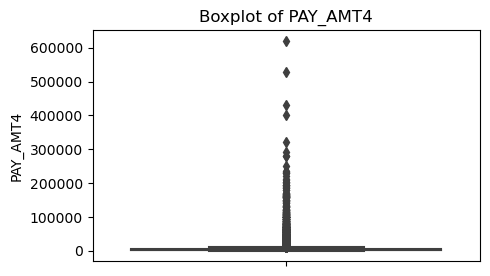

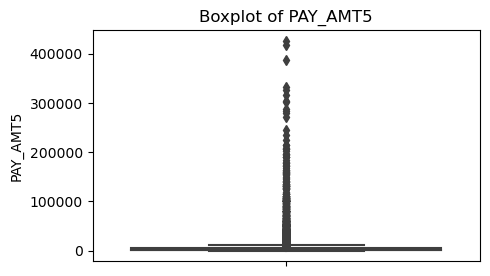

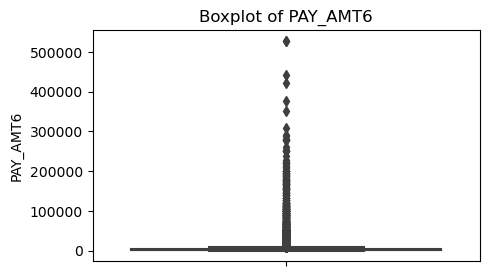

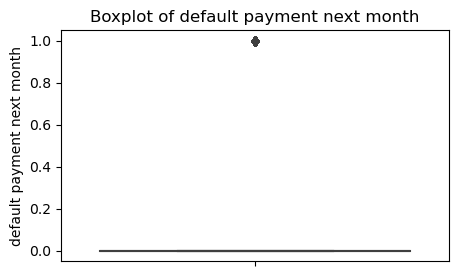

In [22]:
# Creating boxplots for each column in the DataFrame
for column in data.columns:
    plt.figure(figsize=(5, 3))  # Setting the figure size for each plot
    sns.boxplot(y=data[column])  # Creating a boxplot for the current column
    plt.title(f'Boxplot of {column}')  # Setting the title of the plot
    plt.ylabel(column)  # Labeling the y-axis with the column name
    plt.show()  # Displaying the plot

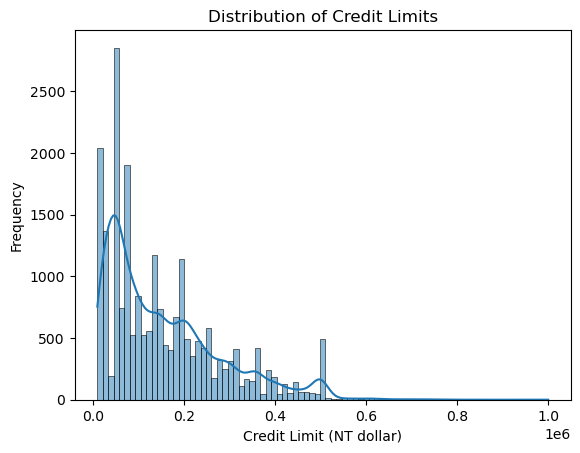

In [23]:
# Histogram with density plot
sns.histplot(data['LIMIT_BAL'], kde=True)
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit (NT dollar)')
plt.ylabel('Frequency')
plt.show()


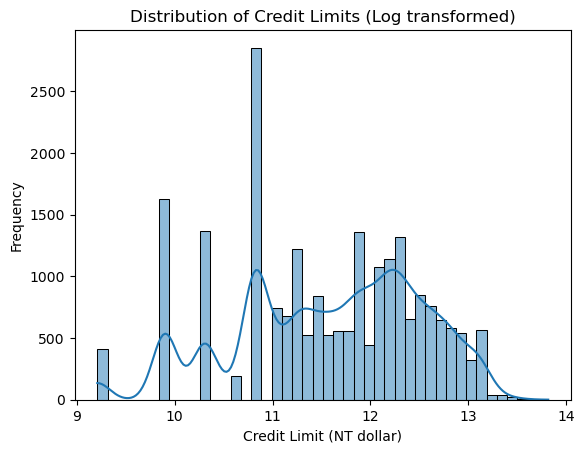

In [24]:
# Applying log transformation to the LIMIT_BAL column to normalize the distribution
data['LIMIT_BAL_log'] = np.log1p(data['LIMIT_BAL'])
# Creating a new column 'LIMIT_BAL_log' in the DataFrame which stores the log-transformed values of 'LIMIT_BAL'.
# The np.log1p function is used for log transformation. It is equivalent to log(1 + x) and helps in handling zero values.

# Histogram with density plot for the log-transformed credit limit
sns.histplot(data['LIMIT_BAL_log'], kde=True)
# Creating a histogram of the log-transformed 'LIMIT_BAL' column with an overlaid density plot using Seaborn's histplot function.
# The kde=True parameter adds the kernel density estimate to the plot, providing a smooth curve representing the data distribution.

plt.title('Distribution of Credit Limits (Log transformed)')
# Setting the title of the plot to 'Distribution of Credit Limits (Log transformed)'.

plt.xlabel('Credit Limit (NT dollar)')
# Labeling the x-axis with 'Credit Limit (NT dollar)'.

plt.ylabel('Frequency')
# Labeling the y-axis with 'Frequency'.

plt.show()
# Displaying the plot.


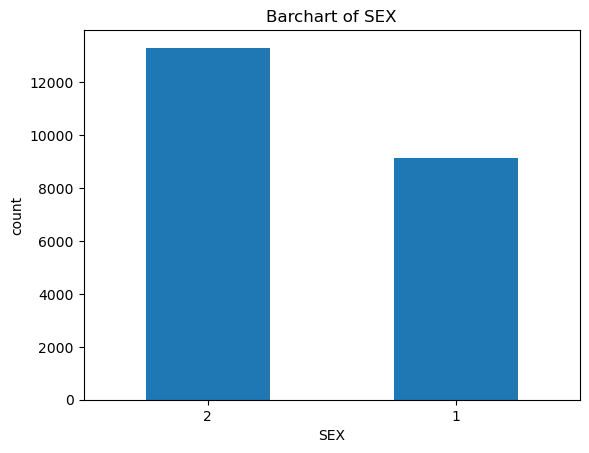

In [25]:
# Creating a bar chart for the 'SEX' column
data['SEX'].value_counts().plot(kind='bar')
# The value_counts() method counts the unique values in the 'SEX' column.
# The plot(kind='bar') method creates a bar chart of these counts.

plt.title('Barchart of SEX')
# Setting the title of the plot to 'Barchart of SEX'.

plt.xlabel('SEX')
# Labeling the x-axis with 'SEX' to indicate the variable being plotted.

plt.ylabel('count')
# Labeling the y-axis with 'count' to indicate the frequency of each unique value in the 'SEX' column.

plt.xticks(rotation=0)
# Rotating the x-axis labels to 0 degrees for better readability.

plt.show()
# Displaying the plot.


In [26]:
# Creating a new column 'sex_dummy' where males are represented as 1 and females as 0
data['sex_dummy'] = data['SEX'].apply(lambda x: 1 if x == 1 else 0)
# The apply() method is used to apply a lambda function to each element of the 'SEX' column.
# The lambda function assigns 1 if the value is 1 (male) and 0 if the value is not 1 (female).

# Dropping the original 'SEX' column from the DataFrame
data = data.drop('SEX', axis=1)
# The drop() method is used to remove the 'SEX' column from the DataFrame.
# The axis=1 parameter specifies that a column (not a row) should be dropped.

# Now, 'SEX' has been removed from the DataFrame and replaced with 'sex_dummy'


In [27]:
# Get descriptive statistics and round the values to 2 decimal places
pande = data.describe().round(2)
# The describe() method provides a summary of the central tendency, dispersion, and shape of the dataset's distribution.
# The round(2) method rounds the descriptive statistics to 2 decimal places for better readability.

# Transpose the DataFrame to switch rows and columns for better readability
pande_transposed = pande.transpose()
# The transpose() method switches rows and columns, making it easier to read the statistics for each column.

# Display the transposed DataFrame
pande_transposed


,count,mean,std,min,25%,50%,75%,max
ID,22455.0,14927.87,8608.85,2.00,7507.00,14941.0,22218.5,30000.00
LIMIT_BAL,22455.0,155047.15,127046.88,10000.00,50000.00,120000.0,220000.0,1000000.00
EDUCATION,22455.0,1.86,0.70,1.00,1.00,2.0,2.0,4.00
MARRIAGE,22455.0,1.56,0.52,1.00,1.00,2.0,2.0,3.00
AGE,22455.0,35.24,9.31,21.00,28.00,34.0,41.0,79.00
PAY_0,22455.0,0.19,0.99,-1.00,0.00,0.0,0.0,8.00
PAY_2,22455.0,0.21,1.03,-1.00,0.00,0.0,0.0,8.00
PAY_3,22455.0,0.19,1.02,-1.00,0.00,0.0,0.0,8.00
PAY_4,22455.0,0.15,0.99,-1.00,0.00,0.0,0.0,8.00
PAY_5,22455.0,0.11,0.94,-1.00,0.00,0.0,0.0,8.00


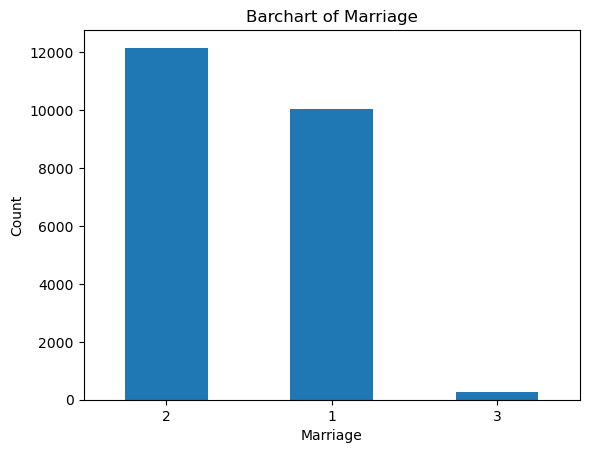

In [28]:
# Creating a bar chart for the 'MARRIAGE' column
data['MARRIAGE'].value_counts().plot(kind='bar')
# The value_counts() method counts the unique values in the 'MARRIAGE' column.
# The plot(kind='bar') method creates a bar chart of these counts.

plt.title('Barchart of Marriage')
# Setting the title of the plot to 'Barchart of Marriage'.

plt.xlabel('Marriage')
# Labeling the x-axis with 'Marriage' to indicate the variable being plotted.

plt.ylabel('Count')
# Labeling the y-axis with 'Count' to indicate the frequency of each unique value in the 'MARRIAGE' column.

plt.xticks(rotation=0)
# Rotating the x-axis labels to 0 degrees for better readability.

plt.show()
# Displaying the plot.


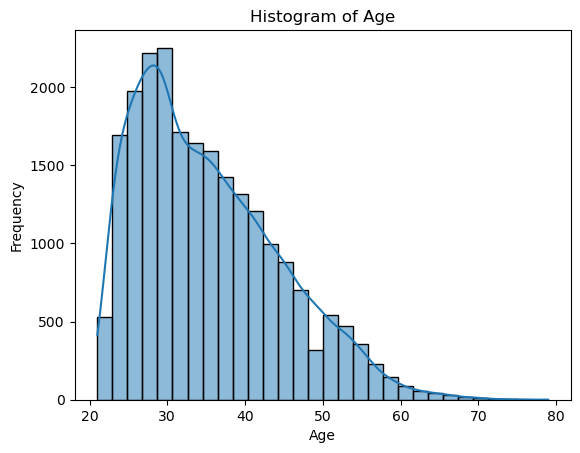

In [29]:
# Plotting a histogram with more bins and an overlaid density plot for the 'AGE' column
sns.histplot(data['AGE'], bins=30, kde=True)  # Adjust the number of bins as needed
# The histplot() function from Seaborn is used to create a histogram.
# The 'AGE' column is specified as the data to be plotted.
# The bins=30 parameter adjusts the number of bins in the histogram to 30.
# The kde=True parameter adds a kernel density estimate to the plot, providing a smooth curve representing the data distribution.

plt.title('Histogram of Age')
# Setting the title of the plot to 'Histogram of Age'.

plt.xlabel('Age')
# Labeling the x-axis with 'Age' to indicate the variable being plotted.

plt.ylabel('Frequency')
# Labeling the y-axis with 'Frequency' to indicate the count of ages in each bin.

plt.show()
# Displaying the plot.


In [30]:
MARRIAGE_DUM = pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE', drop_first=False)

# Concatenate the dummy variables back to the main dataframe
data = pd.concat([data, MARRIAGE_DUM ], axis=1)

# Optionally, you can drop the original 'Marital_status' column if it is no longer needed
data.drop('MARRIAGE', axis=1, inplace=True)

# Display the updated DataFrame to verify the changes
pande = print(data)


          ID  LIMIT_BAL  EDUCATION  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
1          2     120000          2   26     -1      2      0      0      0   
2          3      90000          2   34      0      0      0      0      0   
3          4      50000          2   37      0      0      0      0      0   
4          5      50000          2   57     -1      0     -1      0      0   
5          6      50000          1   37      0      0      0      0      0   
...      ...        ...        ...  ...    ...    ...    ...    ...    ...   
29994  29995      80000          2   34      2      2      2      2      2   
29995  29996     220000          3   39      0      0      0      0      0   
29996  29997     150000          3   43     -1     -1     -1     -1      0   
29997  29998      30000          2   37      4      3      2     -1      0   
29999  30000      50000          2   46      0      0      0      0      0   

       PAY_6  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
1 

In [31]:
# Print all column names to ensure the correct column name is being used
print(data.columns)


Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'LIMIT_BAL_log', 'sex_dummy',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')


In [32]:
data.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL_log,sex_dummy,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,2,120000,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,11.695255,0,0,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,11.407576,0,0,1,0
3,4,50000,2,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,10.819798,0,1,0,0
4,5,50000,2,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,10.819798,1,1,0,0
5,6,50000,1,37,0,0,0,0,0,0,...,657,1000,1000,800,0,10.819798,1,0,1,0


In [33]:
# List of columns related to payment status
payment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Replacing -1 with 0 in the specified columns
data[payment_columns] = data[payment_columns].replace(-1, 0)
# The replace() method is used to replace -1 with 0 in the specified columns.
# The reason for this replacement is that -1 indicates payment made on time, 
# and for better machine learning model understanding, it is more intuitive to denote on-time payments with 0.

# Displaying the first few rows of the DataFrame to verify the changes
data.head()


,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL_log,sex_dummy,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,2,120000,2,26,0,2,0,0,0,2,...,1000,1000,0,2000,1,11.695255,0,0,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,11.407576,0,0,1,0
3,4,50000,2,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,10.819798,0,1,0,0
4,5,50000,2,57,0,0,0,0,0,0,...,10000,9000,689,679,0,10.819798,1,1,0,0
5,6,50000,1,37,0,0,0,0,0,0,...,657,1000,1000,800,0,10.819798,1,0,1,0


In [34]:
data = data.drop('LIMIT_BAL',axis = 1)

In [35]:
print(data.columns)


Index(['ID', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'LIMIT_BAL_log', 'sex_dummy', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')


In [36]:
pande = data.describe().round (2)
pande_transposed = pande.transpose()
pande_transposed

,count,mean,std,min,25%,50%,75%,max
ID,22455.0,14927.87,8608.85,2.00,7507.00,14941.0,22218.5,30000.00
EDUCATION,22455.0,1.86,0.70,1.00,1.00,2.0,2.0,4.00
AGE,22455.0,35.24,9.31,21.00,28.00,34.0,41.0,79.00
PAY_0,22455.0,0.38,0.82,0.00,0.00,0.0,0.0,8.00
PAY_2,22455.0,0.39,0.88,0.00,0.00,0.0,0.0,8.00
PAY_3,22455.0,0.37,0.87,0.00,0.00,0.0,0.0,8.00
PAY_4,22455.0,0.33,0.85,0.00,0.00,0.0,0.0,8.00
PAY_5,22455.0,0.28,0.80,0.00,0.00,0.0,0.0,8.00
PAY_6,22455.0,0.29,0.80,0.00,0.00,0.0,0.0,8.00
BILL_AMT1,22455.0,62461.62,77810.57,0.00,10670.00,35417.0,82575.0,964511.00


In [37]:
print(data.dtypes)

ID                              int64
EDUCATION                       int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
LIMIT_BAL_log                 float64
sex_dummy                       int64
MARRIAGE_1                      uint8
MARRIAGE_2                      uint8
MARRIAGE_3  

In [38]:
pande = data.describe(include = 'all').round (2)
pande_transposed = pande.transpose()
pande_transposed

,count,mean,std,min,25%,50%,75%,max
ID,22455.0,14927.87,8608.85,2.00,7507.00,14941.0,22218.5,30000.00
EDUCATION,22455.0,1.86,0.70,1.00,1.00,2.0,2.0,4.00
AGE,22455.0,35.24,9.31,21.00,28.00,34.0,41.0,79.00
PAY_0,22455.0,0.38,0.82,0.00,0.00,0.0,0.0,8.00
PAY_2,22455.0,0.39,0.88,0.00,0.00,0.0,0.0,8.00
PAY_3,22455.0,0.37,0.87,0.00,0.00,0.0,0.0,8.00
PAY_4,22455.0,0.33,0.85,0.00,0.00,0.0,0.0,8.00
PAY_5,22455.0,0.28,0.80,0.00,0.00,0.0,0.0,8.00
PAY_6,22455.0,0.29,0.80,0.00,0.00,0.0,0.0,8.00
BILL_AMT1,22455.0,62461.62,77810.57,0.00,10670.00,35417.0,82575.0,964511.00


In [39]:
data['MARRIAGE_1'] = data['MARRIAGE_1'].astype(int)
data['MARRIAGE_2'] = data['MARRIAGE_2'].astype(int)
data['MARRIAGE_3'] = data['MARRIAGE_3'].astype(int)


In [40]:
print(data[['MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']].describe())


         MARRIAGE_1    MARRIAGE_2    MARRIAGE_3
count  22455.000000  22455.000000  22455.000000
mean       0.446716      0.541661      0.011623
std        0.497164      0.498272      0.107185
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      1.000000      0.000000
75%        1.000000      1.000000      0.000000
max        1.000000      1.000000      1.000000


In [41]:
pande = data.describe(include = 'all').round (2)
pande_transposed = pande.transpose()
pande_transposed

,count,mean,std,min,25%,50%,75%,max
ID,22455.0,14927.87,8608.85,2.00,7507.00,14941.0,22218.5,30000.00
EDUCATION,22455.0,1.86,0.70,1.00,1.00,2.0,2.0,4.00
AGE,22455.0,35.24,9.31,21.00,28.00,34.0,41.0,79.00
PAY_0,22455.0,0.38,0.82,0.00,0.00,0.0,0.0,8.00
PAY_2,22455.0,0.39,0.88,0.00,0.00,0.0,0.0,8.00
PAY_3,22455.0,0.37,0.87,0.00,0.00,0.0,0.0,8.00
PAY_4,22455.0,0.33,0.85,0.00,0.00,0.0,0.0,8.00
PAY_5,22455.0,0.28,0.80,0.00,0.00,0.0,0.0,8.00
PAY_6,22455.0,0.29,0.80,0.00,0.00,0.0,0.0,8.00
BILL_AMT1,22455.0,62461.62,77810.57,0.00,10670.00,35417.0,82575.0,964511.00


In [42]:
print(data.dtypes)

ID                              int64
EDUCATION                       int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default payment next month      int64
LIMIT_BAL_log                 float64
sex_dummy                       int64
MARRIAGE_1                      int32
MARRIAGE_2                      int32
MARRIAGE_3  

In [43]:
data = data.drop(columns=['ID'])

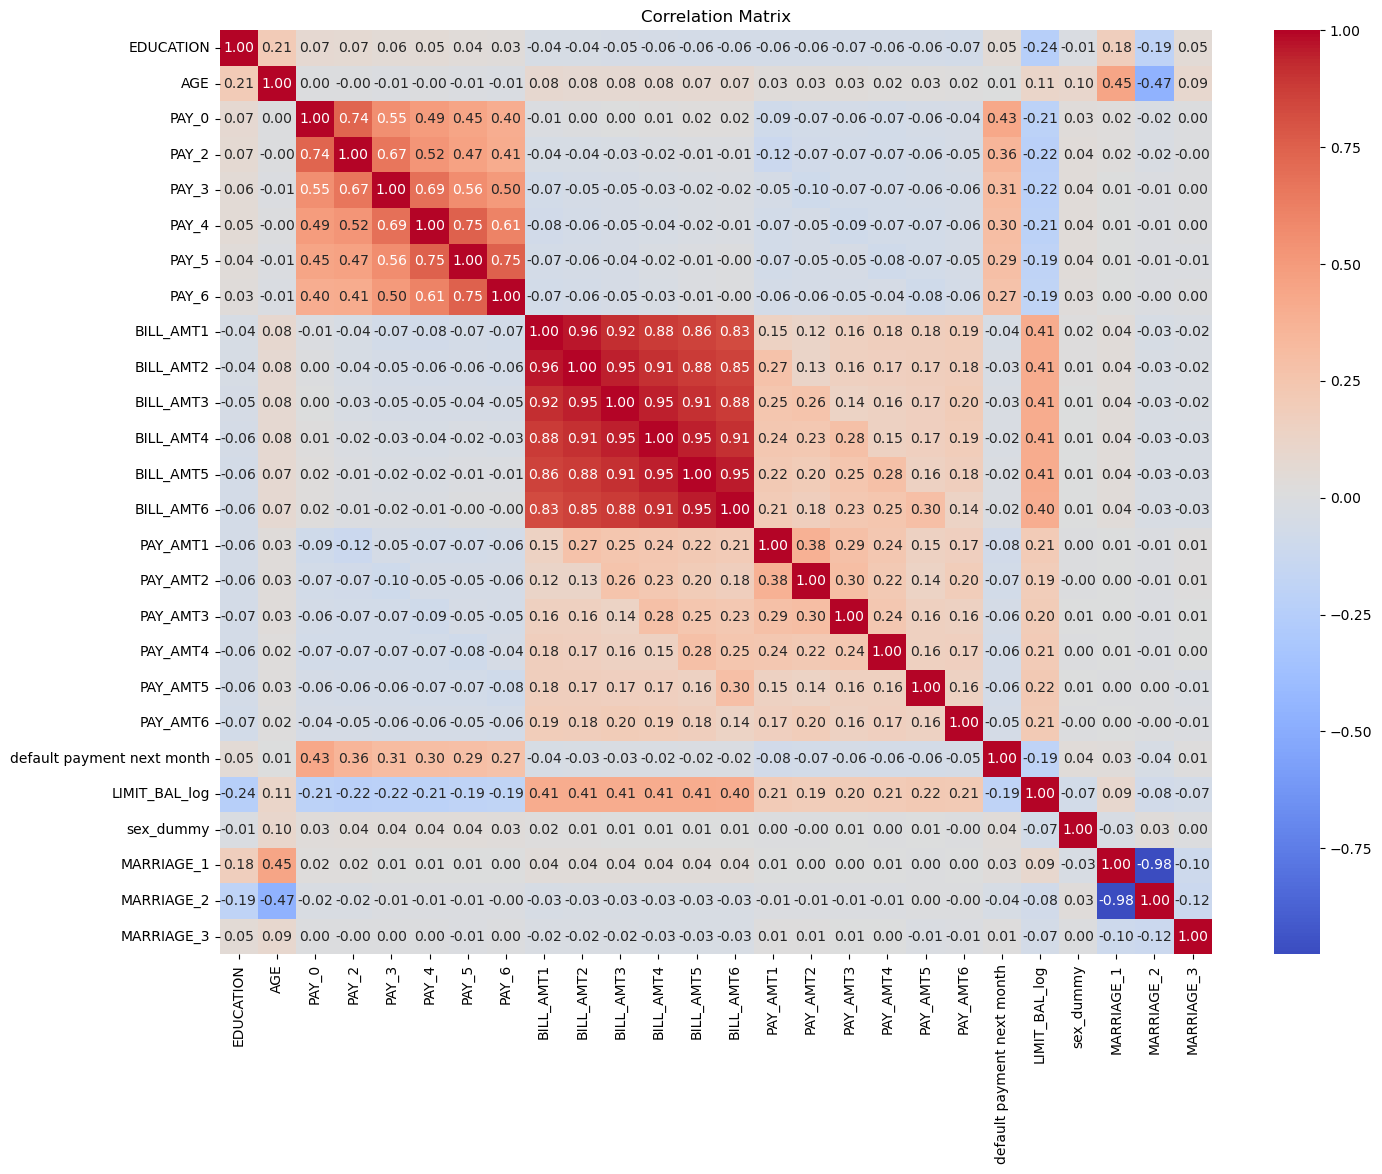

In [44]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [45]:
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

In [46]:
X.head()

,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_log,sex_dummy,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,2,26,0,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,11.695255,0,0,1,0
2,2,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,11.407576,0,0,1,0
3,2,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,10.819798,0,1,0,0
4,2,57,0,0,0,0,0,0,8617,5670,...,36681,10000,9000,689,679,10.819798,1,1,0,0
5,1,37,0,0,0,0,0,0,64400,57069,...,1815,657,1000,1000,800,10.819798,1,0,1,0


In [47]:
y.head()

1    1
2    0
3    0
4    0
5    0
Name: default payment next month, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
feature_importances = rf_model.feature_importances_


In [52]:
# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

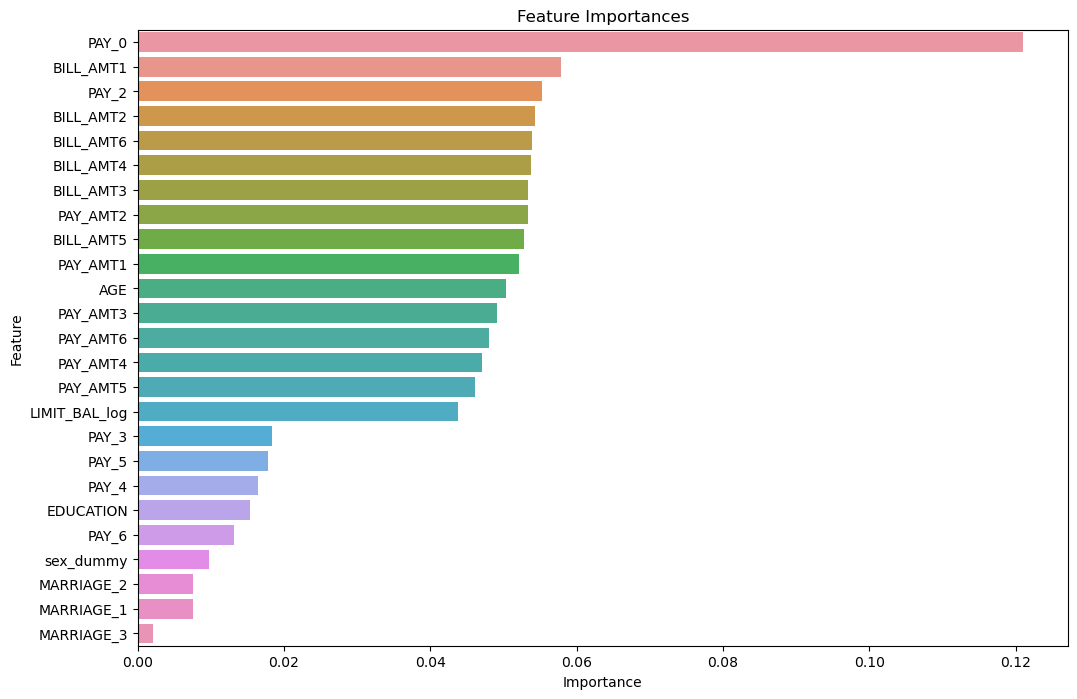

          Feature  Importance
2           PAY_0    0.121074
8       BILL_AMT1    0.057787
3           PAY_2    0.055255
9       BILL_AMT2    0.054248
13      BILL_AMT6    0.053910
11      BILL_AMT4    0.053786
10      BILL_AMT3    0.053402
15       PAY_AMT2    0.053293
12      BILL_AMT5    0.052774
14       PAY_AMT1    0.052139
1             AGE    0.050366
16       PAY_AMT3    0.049065
19       PAY_AMT6    0.047999
17       PAY_AMT4    0.047084
18       PAY_AMT5    0.046119
20  LIMIT_BAL_log    0.043820
4           PAY_3    0.018389
6           PAY_5    0.017758
5           PAY_4    0.016398
0       EDUCATION    0.015409
7           PAY_6    0.013097
21      sex_dummy    0.009699
23     MARRIAGE_2    0.007567
22     MARRIAGE_1    0.007505
24     MARRIAGE_3    0.002055


In [53]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Print the feature importances
print(importance_df)

In [54]:
y_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8100645735916276
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3403
           1       0.68      0.40      0.51      1088

    accuracy                           0.81      4491
   macro avg       0.76      0.67      0.69      4491
weighted avg       0.80      0.81      0.79      4491



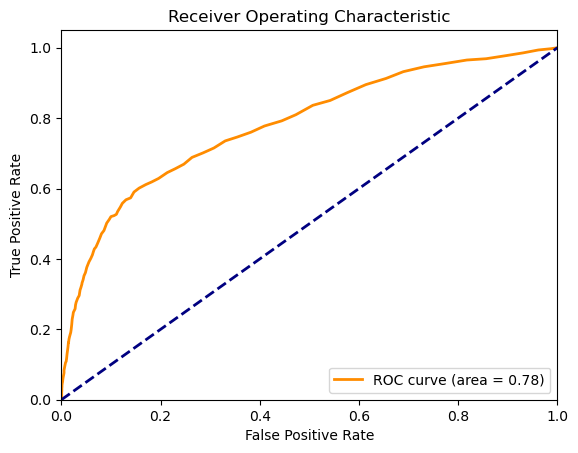

In [55]:

# Predict probabilities and evaluate with ROC and AUC
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()








In [56]:
# Class 0 (0.83),Class 1 (0.68): Precision for class 1 is lower than class 0, indicating that there are more false positives for class 1.
'''The models till now is indicating thepresence of false positives. i.e, eventhough the people pay(default), the model predicts as they do not pay(no default) in some cases'''

'The models till now is indicating thepresence of false positives. i.e, eventhough the people pay(default), the model predicts as they do not pay(no default) in some cases'

In [57]:
# As per correlation matrix and the variable importance, we decided to remove Marriage_i variables, where i = 1,2,3; sex_dummy

X = data.drop(columns=['default payment next month','MARRIAGE_2','MARRIAGE_1','MARRIAGE_3','sex_dummy'])
y = data['default payment next month']

X.head()


,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_log
1,2,26,0,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,11.695255
2,2,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,11.407576
3,2,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,10.819798
4,2,57,0,0,0,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,10.819798
5,1,37,0,0,0,0,0,0,64400,57069,...,19394,19619,20024,2500,1815,657,1000,1000,800,10.819798


In [58]:
y.head()

1    1
2    0
3    0
4    0
5    0
Name: default payment next month, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [60]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

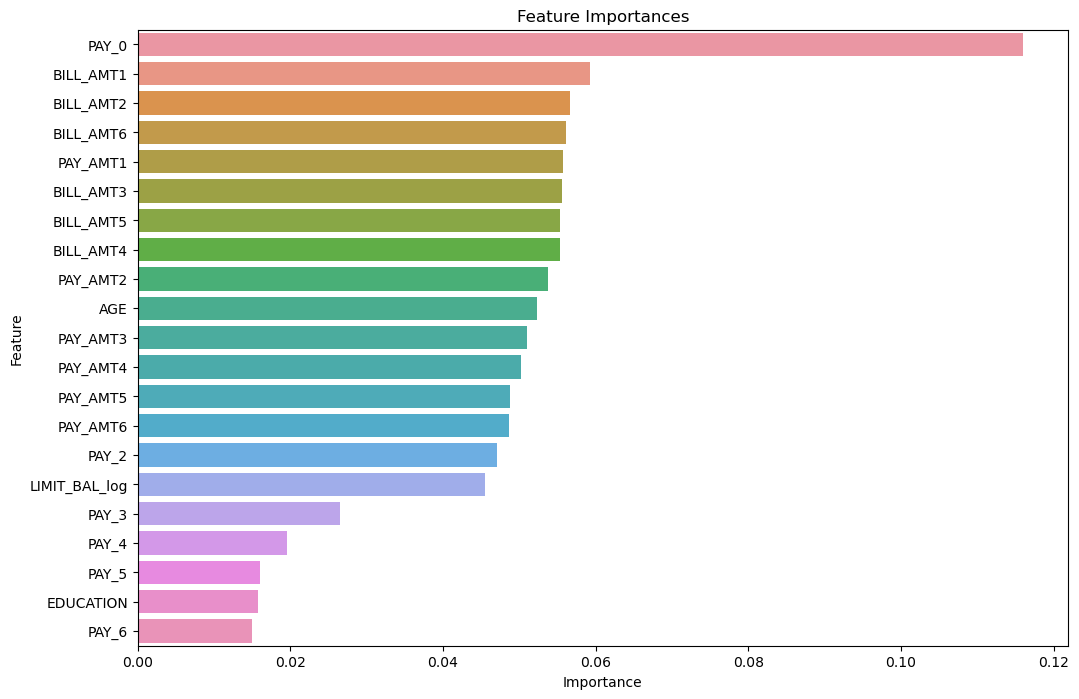

          Feature  Importance
2           PAY_0    0.116049
8       BILL_AMT1    0.059292
9       BILL_AMT2    0.056694
13      BILL_AMT6    0.056062
14       PAY_AMT1    0.055657
10      BILL_AMT3    0.055529
12      BILL_AMT5    0.055331
11      BILL_AMT4    0.055290
15       PAY_AMT2    0.053798
1             AGE    0.052307
16       PAY_AMT3    0.050993
17       PAY_AMT4    0.050207
18       PAY_AMT5    0.048767
19       PAY_AMT6    0.048638
3           PAY_2    0.047097
20  LIMIT_BAL_log    0.045490
4           PAY_3    0.026490
5           PAY_4    0.019499
6           PAY_5    0.016078
0       EDUCATION    0.015816
7           PAY_6    0.014918


In [62]:
feature_importances = rf_model.feature_importances_
# Create a DataFrame for visualization
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Print the feature importances
print(importance_df)

In [63]:
# Making predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.8098419060342908
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      3403
           1       0.68      0.41      0.51      1088

    accuracy                           0.81      4491
   macro avg       0.76      0.67      0.70      4491
weighted avg       0.80      0.81      0.79      4491

Confusion Matrix:
 [[3195  208]
 [ 646  442]]


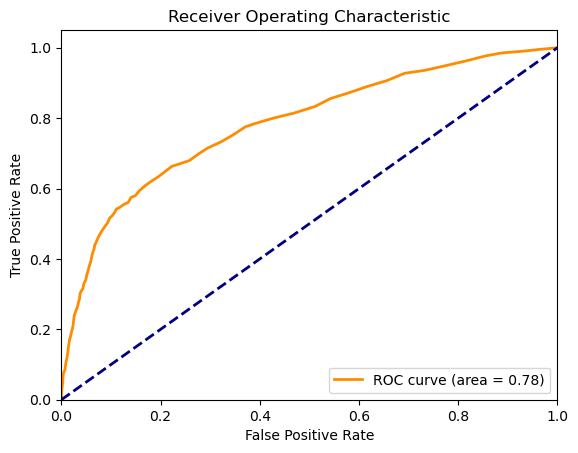

In [64]:
# Predict probabilities and evaluate with ROC and AUC
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()





In [65]:
# Save the trained model
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [66]:
#Grid search algorithm
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\katre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 300}


In [67]:
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    max_features='sqrt'  # adjusted based on warning
)
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=300)

In [68]:
# Making predictions on the test set
predictions = best_rf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.8120685816076597
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      3403
           1       0.69      0.40      0.51      1088

    accuracy                           0.81      4491
   macro avg       0.76      0.67      0.70      4491
weighted avg       0.80      0.81      0.79      4491

Confusion Matrix:
 [[3207  196]
 [ 648  440]]


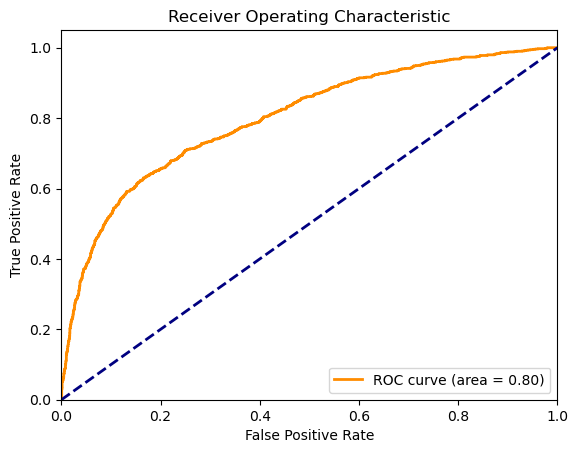

In [69]:
# Predict probabilities and evaluate with ROC and AUC
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()





In [70]:
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold: ", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean accuracy: ", np.mean(scores))
print("Standard deviation: ", np.std(scores))

# the output we got from 5 fold cross validation is satisfacroy and consistent.
# where we have lower standard deviation. Otherwise, we have to check the Data
# Quality and do future engineering.

Accuracy for each fold:  [0.80338455 0.80293921 0.81785794 0.82921398 0.82275662]
Mean accuracy:  0.8152304609218437
Standard deviation:  0.010492722834977302


In [71]:
#!pip install xgboost
# this is another algorithm called gradient boost.


In [72]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [73]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Performance")
print("Accuracy:", accuracy)
print(report)

XGBoost Model Performance
Accuracy: 0.8058338900022267
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3403
           1       0.66      0.41      0.50      1088

    accuracy                           0.81      4491
   macro avg       0.75      0.67      0.69      4491
weighted avg       0.79      0.81      0.79      4491



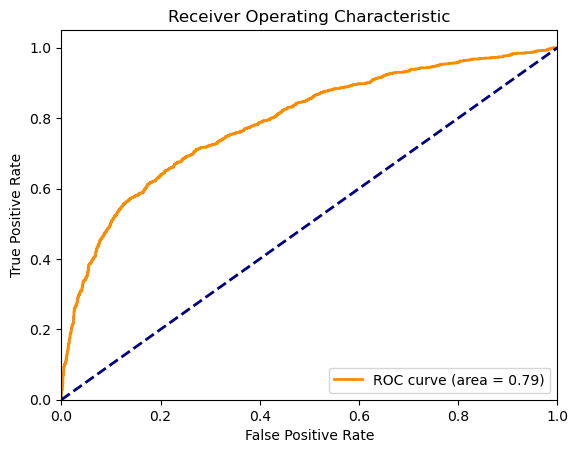

In [74]:
# Predict probabilities and evaluate with ROC and AUC
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()





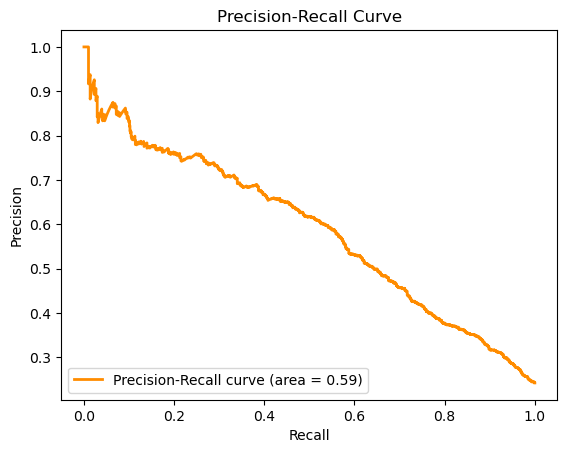

In [75]:
# Predict probabilities and evaluate with Precision and Recall
y_prob = xgb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [76]:
'''Trying to split original dataset into test, train, valid'''


'Trying to split original dataset into test, train, valid'

In [77]:
# Split the data into 60% training, 20% validation, and 20% test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Here, test_size=0.5 corresponds to 0.5 * 0.4 = 0.2 of the original dataset for both validation and test sets

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Now you have X_train, X_valid, X_test, y_train, y_valid, y_test


In [78]:


# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the shape of the original and SMOTE-enhanced training sets
print("Original training set shape:", X_train.shape, y_train.shape)
print("SMOTE-enhanced training set shape:", X_train_smote.shape, y_train_smote.shape)

# Print class distribution before and after SMOTE
print("\nClass distribution before SMOTE:")
print(f"Class 0: {sum(y_train == 0)}, Class 1: {sum(y_train == 1)}")
print("Class distribution after SMOTE:")
print(f"Class 0: {sum(y_train_smote == 0)}, Class 1: {sum(y_train_smote == 1)}")

Original training set shape: (700, 20) (700,)
SMOTE-enhanced training set shape: (1278, 20) (1278,)

Class distribution before SMOTE:
Class 0: 639, Class 1: 61
Class distribution after SMOTE:
Class 0: 639, Class 1: 639


In [79]:


# Create and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)

# Print accuracy
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9533

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       261
           1       0.82      0.82      0.82        39

    accuracy                           0.95       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.95      0.95      0.95       300



In [83]:
from sklearn.svm import SVC

# Create and train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)

# Print accuracy
print(f"SVM Accuracy: {accuracy:.4f}")

# Print classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.9567

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       261
           1       0.93      0.72      0.81        39

    accuracy                           0.96       300
   macro avg       0.95      0.86      0.89       300
weighted avg       0.96      0.96      0.95       300



In [84]:


# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform 100-fold cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=100, scoring='accuracy')

# Print results
print("Random Forest 100-Fold Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(rf_scores):.4f}")
print(f"Standard Deviation: {np.std(rf_scores):.4f}")

Random Forest 100-Fold Cross-Validation Results:
Mean Accuracy: 0.9914
Standard Deviation: 0.0268


In [85]:


# Split the SMOTE-enhanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate accuracies on training and testing data
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9922


In [86]:


# Assuming 'data' is your DataFrame and 'target' is your target variable
correlations = data.corr()
# Filter to show only correlations with the target variable
target_correlations = correlations['default payment next month'].sort_values()

# Display correlations
print(target_correlations)


LIMIT_BAL_log                -0.192244
PAY_AMT1                     -0.076562
PAY_AMT2                     -0.066140
PAY_AMT5                     -0.061534
PAY_AMT4                     -0.060505
PAY_AMT3                     -0.057018
PAY_AMT6                     -0.052605
MARRIAGE_2                   -0.037194
BILL_AMT1                    -0.035750
BILL_AMT2                    -0.029212
BILL_AMT3                    -0.026636
BILL_AMT4                    -0.021818
BILL_AMT5                    -0.016909
BILL_AMT6                    -0.015853
AGE                           0.009852
MARRIAGE_3                    0.011795
MARRIAGE_1                    0.034734
sex_dummy                     0.040406
EDUCATION                     0.051424
PAY_6                         0.273777
PAY_5                         0.289613
PAY_4                         0.297431
PAY_3                         0.314940
PAY_2                         0.357297
PAY_0                         0.434513
default payment next mont

In [87]:
# import pandas as pd
# full_data = pd.concat([X, y.rename('default payment of next month')], axis=1)
# correlations = full_data.corr()

# target_correlations = correlations['default payment of next month'].sort_values()

# print("Correlations with 'Default Payment Next Month':\n", target_correlations)

In [88]:


# Define your model
model = RandomForestClassifier()

# Setup cross-validation with shuffling
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Assuming X are features and y is the target in your data
# Check and print column names to verify the exact name of the target column
print(data.columns)


# Perform cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", scores)


Index(['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month',
       'LIMIT_BAL_log', 'sex_dummy', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')
Cross-validation scores: [0.945 0.98  0.965 0.96  0.985]


In [89]:
model.fit(X, y)
# feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# print("Feature importances:\n", feature_importances)


RandomForestClassifier()

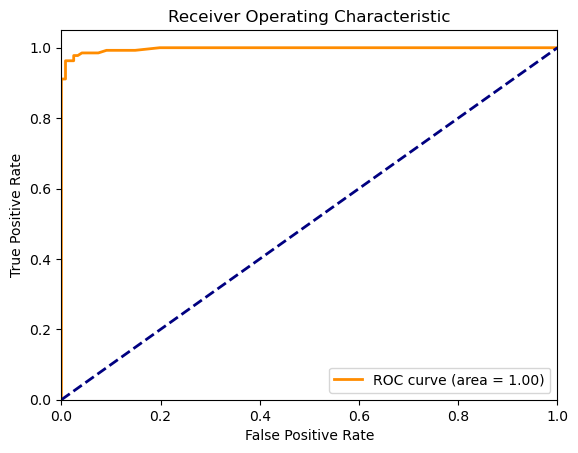

In [90]:
# Predict probabilities and evaluate with ROC and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



